<a href="https://colab.research.google.com/github/hilya09/phishing-detection/blob/main/Train_model_eksperimen_lebih_1_Variabel_Kombinasi_Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import zipfile
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download dataset

In [ ]:
# Download the file
!wget https://raw.githubusercontent.com/hilya09/dataset/main/urldataset_new.csv

--2024-05-07 08:00:29--  https://raw.githubusercontent.com/hilya09/dataset/main/urldataset_new.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10404694 (9.9M) [text/plain]
Saving to: ‘urldataset_new.csv’

urldataset_new.csv  100%[===================>]   9.92M  30.1MB/s    in 0.3s    

2024-05-07 08:00:31 (30.1 MB/s) - ‘urldataset_new.csv’ saved [10404694/10404694]



In [ ]:
data = pd.read_csv("urldataset_new.csv")

# Exploratory Data Analysis (EDA)

In [ ]:
data

,URL,Label
0,https://pogodasub.com/2Ge6I0rd/4p0OksK6-inteli...,0
1,https://pogodasub.com/2Ge6I0rd/Ly6I98Se-ipko/l...,0
2,https://pogodasub.com/2Ge6I0rd/hz6hZnA,0
3,https://resicorphome.com/brian/srr/austin/,0
4,https://kurier24-oplata.com/PzVxLK7l/WdJslUDi-...,0
...,...,...
259643,https://www.lovetheedit.com/postnewo/www.dropb...,1
259644,http://www.vg247.com/2017/04/24/best-nintendo-...,0
259645,https://lt.mydplr.com/16672ac75448ecdb528e1c66...,1
259646,http://www.heinzreber.net/homeflash1.html,1


In [ ]:
data['Label'].unique()

array([0, 1])

In [ ]:
print('Total Jumlah url:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] Good\t\t:', data[data.Label == 0].shape[0], 'data url')
print('-- [1] Phishing\t\t:', data[data.Label == 1].shape[0], 'data url\n')

Total Jumlah url: 259648 data

terdiri dari (label):
-- [0] Good		: 106372 data url
-- [1] Phishing		: 153276 data url



In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

URL      0
Label    0
dtype: int64

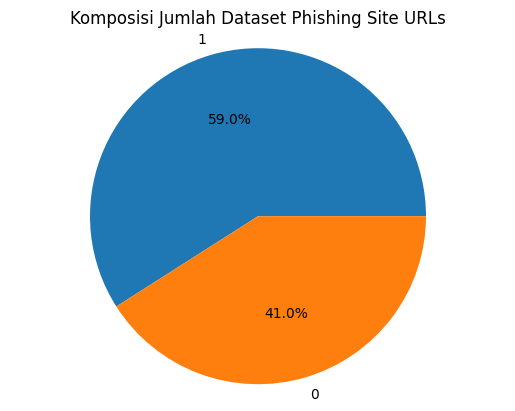

In [ ]:
# Konversi data menjadi DataFrame
df = pd.DataFrame(data, columns=['Label'])

# Hitung jumlah masing-masing label
label_count = df['Label'].value_counts()

# Buat pie chart menggunakan Seaborn
plt.title('Komposisi Jumlah Dataset Phishing Site URLs')
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%')

# Tampilkan pie chart
plt.axis('equal')
plt.show()

# Feature Engineering

In [ ]:
# importing required packages for this section
from urllib.parse import urlparse
import re

In [ ]:
#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

In [ ]:
#Cek adanya penyederhanaan pada url (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0
data['tiny_url'] = data['URL'].apply(lambda i: tinyURL(i))

In [ ]:
# https in scheme
def httpsURL(url):
  # Parse the URL to extract the scheme/protocol
  parsed_url = urlparse(url)
  scheme = parsed_url.scheme

  # Check if the scheme/protocol is "https"
  if scheme == "https":
    return 0  # Legitimate
  else:
    return 1  # Phishing

data['https_scheme'] = data['URL'].apply(lambda i: httpsURL(i))

# url = 'https://colab.research.google.com/drive/1EpFJ9hNLUqSVpakEaCROVT6J8SqL40nt#scrollTo=yPUvNqOJDRXl'
# result = detect_https_protocol(url)
# print(result)

In [ ]:
# https in scheme
def httpURL(url):
  # Parse the URL to extract the scheme/protocol
  parsed_url = urlparse(url)
  scheme = parsed_url.scheme

  # Check if the scheme/protocol is "https"
  if scheme == "http":
    return 1 # Phishing
  else:
    return 0  # Legitimate

data['http_scheme'] = data['URL'].apply(lambda i: httpURL(i))

# url = 'http://colab.research.google.com/drive/1EpFJ9hNLUqSVpakEaCROVT6J8SqL40nt#scrollTo=yPUvNqOJDRXl'
# result = detect_http_protocol(url)
# print(result)

In [ ]:
# Fungsi untuk memeriksa validitas TLD
def tldValid(url):
    valid_tlds = ['aero', 'asia', 'biz', 'cat','com', 'coop', 'info', 'int','jobs','mobi','museum', 'name', 'net', 'org', 'pro', 'tel', 'travel', 'xxx', 'edu',
                  'gov', 'mil', 'ac', 'ad', 'ae', 'af', 'ag', 'ai', 'al', 'am', 'an', 'ao', 'aq', 'ar', 'as', 'at', 'au', 'aw', 'ax', 'az', 'ba', 'bb', 'bd', 'be',
                  'bf', 'bg', 'bh', 'bi', 'bj', 'bm', 'bn', 'bo', 'br', 'bs', 'bt', 'bv', 'bw', 'by', 'bz', 'ca', 'cc', 'cd', 'cf', 'cg', 'ch', 'ci', 'ck', 'cl',
                  'cm', 'cn', 'co', 'cr', 'cs', 'cu', 'cv', 'cx', 'cy', 'cz', 'dd', 'de', 'dj', 'dk', 'dm', 'do', 'dz', 'ec', 'ee', 'eg', 'eh', 'er', 'es', 'et',
                  'eu', 'fi', 'fj', 'fk', 'fm', 'fo', 'fr', 'ga', 'gb', 'gd', 'ge', 'gf', 'gg', 'gh', 'gi', 'gl', 'gm', 'gn', 'gp', 'gq', 'gr', 'gs', 'gt', 'gu',
                  'gw', 'gy', 'hk', 'hm', 'hn', 'hr', 'ht', 'hu', 'id', 'ie', 'il', 'im', 'in', 'io', 'iq', 'ir', 'is', 'it', 'je', 'jm', 'jo', 'jp', 'ke', 'kg',
                  'kh', 'ki', 'km', 'kn', 'kp', 'kr', 'kw', 'ky', 'kz', 'la', 'lb', 'lc', 'li', 'lk', 'lr', 'ls', 'lt', 'lu', 'lv', 'ly', 'ma', 'mc', 'md', 'me',
                  'mg', 'mh', 'mk', 'ml', 'mm', 'mn', 'mo', 'mp', 'mq', 'mr', 'ms', 'mt', 'mu', 'mv', 'mw', 'mx', 'my', 'mz', 'na', 'nc', 'ne', 'nf', 'ng', 'ni',
                  'nl', 'no', 'np', 'nr', 'nu', 'nz', 'om', 'pa', 'pe', 'pf', 'pg', 'ph', 'pk', 'pl', 'pm', 'pn', 'pr', 'ps', 'pt', 'pw', 'py', 'qa', 're', 'ro',
                  'rs', 'ru', 'rw', 'sa', 'sb', 'sc', 'sd', 'se', 'sg', 'sh', 'si', 'sj', 'sk', 'sl', 'sm', 'sn', 'so', 'sr', 'ss', 'st', 'su', 'sv', 'sy', 'sz',
                  'tc', 'td', 'tf', 'tg', 'th', 'tj', 'tk', 'tl', 'tm', 'tn', 'to', 'tp', 'tr', 'tt', 'tv', 'tw', 'tz', 'ua', 'ug', 'uk', 'us', 'uy', 'uz', 'va',
                  'vc', 've', 'vg', 'vi', 'vn', 'vu', 'wf', 'ws', 'ye', 'yt', 'yu', 'za', 'zm', 'zw']
    parsed_url = urlparse(url)
    domain = parsed_url.netloc.split('.')[-1]
    if domain in valid_tlds:
        return 0
    else:
        return 1

data['top_level_domain'] = data['URL'].apply(lambda i: tldValid(i))

In [ ]:
# Fungsi untuk menghitung panjang URL
def getLength(url):
    if len(url) < 75:
        length = 0
    elif 75 <= len(url) < 100:
        length = 0.5
    else:
        length = 1
    return length

data['len_url_full'] = data['URL'].apply(lambda i: getLength(i))

In [ ]:
# Fungsi untuk memeriksa jumlah karakter alfabet dalam URL
def alphabet_length(url):
    alphabet_count = sum(1 for char in url if char.isalpha())
    if alphabet_count > 10:
        return 0
    else:
        return 1
data['len_alphabet_full'] = data['URL'].apply(lambda i: alphabet_length(i))

In [ ]:
# Fungsi untuk memeriksa jumlah karakter non-alfabet dalam URL
def non_alphabet_length(url):
    non_alphabet_count = sum(1 for char in url if not char.isalpha())
    if non_alphabet_count < 3:
        return 0
    else:
        return 1
data['len_non_alphabet_full'] = data['URL'].apply(lambda i: non_alphabet_length(i))

In [ ]:
# Fungsi untuk memeriksa jumlah karakter khusus dalam URL
def special_character_length(url):
    special_character_count = sum(1 for char in url if not char.isalnum())
    if special_character_count == 0:
        return 0
    else:
        return 1
data['len_spec_character_full'] = data['URL'].apply(lambda i: special_character_length(i))

In [ ]:
# Fungsi untuk menghitung jumlah simbol "@" dalam URL
def count_at_symbol(url):
    at_count = url.count('@')
    if at_count == 0:
        return 0  # Legitimate
    else:
        return 1 # Suspicious
data['count@_full'] = data['URL'].apply(lambda i: count_at_symbol(i))

In [ ]:
# Fungsi untuk menghitung jumlah simbol "." dalam URL
def count_dot(url):
    dot_count = url.count('.')
    if dot_count < 3:
        return 0  # Legitimate
    else:
        return 1  # Suspicious
data['count_dot_full'] = data['URL'].apply(lambda i: count_dot(i))

In [ ]:
# Fungsi untuk menghitung jumlah simbol "-" dalam URL
def count_dash(url):
    dash_count = url.count('-')
    if dash_count < 3:
        return 0
    else:
        return 1
data['count_dash_full'] = data['URL'].apply(lambda i: count_dash(i))

In [ ]:
# Fungsi untuk menghitung jumlah simbol "_" dalam URL
def count_underscore(url):
    underscore_count = url.count('_')
    if underscore_count == 0:
        return 0
    else:
        return 1
data['count_underscore_full'] = data['URL'].apply(lambda i: count_underscore(i))

In [ ]:
# Fungsi untuk menghitung jumlah simbol "/" dalam URL
def count_slash(url):
    slash_count = url.count('/')
    if slash_count < 5:
        return 0
    else:
        return 1
data['count_slash_full'] = data['URL'].apply(lambda i: count_slash(i))

In [ ]:
# Fungsi untuk menghitung jumlah simbol "?" dalam URL
def count_question_mark(url):
    question_mark_count = url.count('?')
    if question_mark_count == 0:
        return 0
    else:
        return 1
data['count_question_mark_full'] = data['URL'].apply(lambda i: count_question_mark(i))

In [ ]:
# Fungsi untuk menghitung jumlah simbol "=" dalam URL
def count_equal(url):
    equal_count = url.count('=')
    if equal_count == 0:
        return 0
    else:
        return 1
data['count_equal_full'] = data['URL'].apply(lambda i: count_equal(i))

In [ ]:
# Fungsi untuk menghitung jumlah simbol "&" dalam URL
def count_ampersand(url):
    ampersand_count = url.count('&')
    if ampersand_count == 0:
        return 0
    else:
        return 1
data['count_ampersand_full'] = data['URL'].apply(lambda i: count_ampersand(i))

In [ ]:
# Fungsi untuk menghitung jumlah koma dalam URL
def count_comma(url):
    comma_count = url.count(',')
    if comma_count == 0:
        return 0
    else:
        return 1
data['count_comma_full'] = data['URL'].apply(lambda i: count_comma(i))

In [ ]:
# Fungsi untuk menghitung jumlah asterisk dalam URL
def count_asterisk(url):
    asterisk_count = url.count('*')
    if asterisk_count == 0:
        return 0
    else:
        return 1
data['count_asterisk_full'] = data['URL'].apply(lambda i: count_asterisk(i))

In [ ]:
# Fungsi untuk menghitung jumlah tanda pagar dalam URL
def count_hashtag(url):
    hashtag_count = url.count('#')
    if hashtag_count == 1:
        return 0
    else:
        return 1
data['count_hashtag_full'] = data['URL'].apply(lambda i: count_hashtag(i))

In [ ]:
# Fungsi untuk menghitung jumlah titik koma dalam URL
def count_semicolon(url):
    semicolon_count = url.count(';')
    if semicolon_count == 0:
        return 0
    else:
        return 1
data['count_semicolon_full'] = data['URL'].apply(lambda i: count_semicolon(i))

In [ ]:
# Domain of the URL (Domain)
def getDomain(url):
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
    domain = domain.replace("www.","")
  return domain

url= 'https://www.colab.research.google.com/drive/1EpFJ9hNLUqSVpakEaCROVT6J8SqL40nt#scrollTo=ZmhhaXruVUNV'
domain = getDomain(url)
netloc_parts = domain.split('.')  # Memecah domain menjadi bagian-bagian
subdomain = '.'.join(netloc_parts[:-2])  # Menggabungkan bagian-bagian kecuali yang terakhi
subdomain_length = len(domain)
print(netloc_parts)
print(domain)
print(subdomain)
print(subdomain_length)

['colab', 'research', 'google', 'com']
colab.research.google.com
colab.research
25


In [ ]:
# Fungsi untuk menghitung panjang domain dalam URL
def domain_length(url):
    domain = getDomain(url)
    if len(domain) < 20:
        return 0
    else:
        return 1
data['domain_length'] = data['URL'].apply(lambda i: domain_length(i))

In [ ]:
# Fungsi untuk menghitung jumlah karakter alfabet dalam domain URL
def alphabet_domain_length(url):
    domain = getDomain(url)
    alphabet_count = sum(c.isalpha() for c in domain)
    if alphabet_count > 4:
        return 0
    else:
        return 1
data['len_alphabet_domain'] = data['URL'].apply(lambda i: alphabet_domain_length(i))

In [ ]:
# Fungsi untuk menghitung jumlah karakter non alfabet dalam domain URL
def non_alphabet_domain_length(url):
    domain = getDomain(url)
    non_alphabet_count = sum(not c.isalpha() for c in domain)
    if non_alphabet_count < 3:
        return 0
    else:
        return 1
data['len_non_alphabet_domain'] = data['URL'].apply(lambda i: non_alphabet_domain_length(i))
# url = 'signin.eby.de.zukruygxctzmmqi.civpro.co.za'
# result = nonalphabet_domain_count(url)
# print(result)

In [ ]:
# Fungsi untuk memeriksa jumlah karakter khusus dalam domain URL
def special_chars_domain_length(url):
    domain = getDomain(url)
    special_chars = set("!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~")
    special_char_count = sum(c in special_chars for c in domain)
    if special_char_count == 0 :
        return 0
    else:
        return 1
data['len_special_chars_domain'] = data['URL'].apply(lambda i: special_chars_domain_length(i))

In [ ]:
# Fungsi untuk memeriksa jumlah @ dalam domain URL
def count_at_domain(url):
    domain = getDomain(url)
    at_count = domain.count('@')
    return 0 if at_count == 0 else 1
data['count@_domain'] = data['URL'].apply(lambda i: count_at_domain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah . dalam domain URL
def count_dot_domain(url):
    domain = getDomain(url)
    dot_count = domain.count('.')
    return 0 if dot_count == 0 else 1
data['count_dot_domain'] = data['URL'].apply(lambda i: count_dot_domain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah - dalam domain URL
def count_dash_domain(url):
    domain = getDomain(url)
    dash_count = domain.count('-')
    return 0 if dash_count < 3 else 1
data['count_dash_domain'] = data['URL'].apply(lambda i: count_dash_domain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah _ dalam domain URL
def count_underscore_domain(url):
    domain = getDomain(url)
    underscore_count = domain.count('_')
    return 0 if underscore_count == 0 else 1
data['count_underscore_domain'] = data['URL'].apply(lambda i: count_underscore_domain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah / dalam domain URL
def count_slash_domain(url):
    domain = getDomain(url)
    slash_count = domain.count('/')
    return 0 if slash_count == 0 else 1
data['count_slash_domain'] = data['URL'].apply(lambda i: count_slash_domain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah ? dalam domain URL
def count_question_mark_domain(url):
    domain = getDomain(url)
    count_question_mark_count = domain.count('?')
    return 0 if count_question_mark_count == 0 else 1
data['count_question_mark_domain'] = data['URL'].apply(lambda i: httpURL(i))

In [ ]:
# Fungsi untuk memeriksa jumlah = dalam domain URL
def count_equal_domain(url):
    domain = getDomain(url)
    count_equal_count = domain.count('=')
    return 0 if count_equal_count == 0 else 1
data['count_equal_domain'] = data['URL'].apply(lambda i: count_equal_domain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah & dalam domain URL
def count_ampersand_domain(url):
    domain = getDomain(url)
    count_ampersand_count = domain.count('&')
    return 0 if count_ampersand_count == 0 else 1
data['count_ampersand_domain'] = data['URL'].apply(lambda i: httpURL(i))

In [ ]:
# Fungsi untuk memeriksa jumlah , dalam domain URL
def count_comma_domain(url):
    domain = getDomain(url)
    count_comma_count = domain.count(',')
    return 0 if count_comma_count == 0 else 1
data['count_comma_domain'] = data['URL'].apply(lambda i: count_comma_domain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah * dalam domain URL
def count_asterisk_domain(url):
    domain = getDomain(url)
    count_asterisk_count = domain.count('*')
    return 0 if count_asterisk_count == 0 else 1
data['count_asterisk_domain'] = data['URL'].apply(lambda i: httpURL(i))

In [ ]:
# Fungsi untuk memeriksa jumlah # dalam domain URL
def count_hashtag_domain(url):
    domain = getDomain(url)
    count_hashtag_count = domain.count('#')
    return 0 if count_hashtag_count == 0 else 1
data['count_hashtag_domain'] = data['URL'].apply(lambda i: count_hashtag_domain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah ; dalam domain URL
def count_semicolon_domain(url):
    domain = getDomain(url)
    count_semicolon_count = domain.count(';')
    return 0 if count_semicolon_count == 0 else 1
data['count_semicolon_domain'] = data['URL'].apply(lambda i: count_semicolon_domain(i))

In [ ]:
url = 'signin.eby.de.zukruygxctzmmqi.civpro.co.za'
parsed_url = urlparse(url)
print(parsed_url)

ParseResult(scheme='', netloc='', path='signin.eby.de.zukruygxctzmmqi.civpro.co.za', params='', query='', fragment='')


In [ ]:
url = 'https://www.kaggle.com/code/tylersullivan/classifying-phishing-urls-three-models'
parsed_url = urlparse(url)
print(parsed_url)

ParseResult(scheme='https', netloc='www.kaggle.com', path='/code/tylersullivan/classifying-phishing-urls-three-models', params='', query='', fragment='')


In [ ]:
url = 'https://www.kaggle.com/code/tylersullivan/classifying-phishing-urls-three-models'
parsed_url = urlparse(url)
domain = parsed_url.netloc.split('.')  # Mengambil domain dari URL
print(domain)

['www', 'kaggle', 'com']


In [ ]:
url1 = 'https://www.kaggle.com/code/tylersullivan/classifying-phishing-urls-three-models'
parsed_url = getDomain(url1)
netloc_parts = parsed_url.split('.')  # Memecah domain menjadi bagian-bagian
subdomain = '.'.join(netloc_parts[:-2])  # Menggabungkan bagian-bagian kecuali yang terakhir
print(parsed_url)
print(subdomain)

kaggle.com



In [ ]:
url1 = 'retajconsultancy.com'
parsed_url = getDomain(url1)
netloc_parts = parsed_url.split('.')  # Memecah domain menjadi bagian-bagian
subdomain = '.'.join(netloc_parts[:-2])  # Menggabungkan bagian-bagian kecuali yang terakhir
print(parsed_url)
print(subdomain)

In [ ]:
def getSubdomain(url):
  domain = getDomain(url)
  netloc_parts = domain.split('.')  # Memecah domain menjadi bagian-bagian
  if len(netloc_parts) <= 2:  # Jika URL tidak memiliki subdomain
    return 0
  else:
    subdomain = '.'.join(netloc_parts[:-2])  # Menggabungkan bagian-bagian subdomain
    return subdomain

In [ ]:
# Fungsi untuk menghitung panjang subdomain dalam URL
def len_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      subdomain_length = len(subdomain)
      return 0 if subdomain_length < 15 else 1
data['len_subdomain'] = data['URL'].apply(lambda i: len_subdomain(i))

# Contoh penggunaan
# result = len_subdomain(url)
# print(result)  # Output: 0

In [ ]:
# Fungsi untuk memeriksa jumlah karakter alfabet dalam subdomain URL
def alphabet_subdomain_length(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      alphabet_count = sum(c.isalpha() for c in subdomain)
      return 0 if alphabet_count > 4 else 1
data['len_alphabet_subdomain'] = data['URL'].apply(lambda i: alphabet_subdomain_length(i))

In [ ]:
# Fungsi untuk memeriksa jumlah karakter non alfabet dalam subdomain URL
def non_alphabet_subdomain_length(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      non_alphabet_count = sum(not c.isalpha() for c in subdomain)
      return 0 if non_alphabet_count < 2 else 1
data['len_non_alphabet_subdomain'] = data['URL'].apply(lambda i: non_alphabet_subdomain_length(i))
# url = 'signin.eby.de.zukruygxctzmmqi.civpro.co.za'
# result = len_non_alphabet_subdomain(url)
# print(result)

In [ ]:
# Fungsi untuk memeriksa jumlah special karakter dalam subdomain URL
def spec_character_subdomain_length(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      spec_character_count = sum(not c.isalnum() for c in subdomain)
      return 0 if spec_character_count == 0 else 1
data['len_special_char_subdomain'] = data['URL'].apply(lambda i: spec_character_subdomain_length(i))

In [ ]:
# Fungsi untuk memeriksa jumlah @ dalam subdomain URL
def count_at_subdomain(url):
  subdomain = getSubdomain(url)
  if subdomain == 0:
    return 0
  else:
    count = subdomain.count('@')
    if count == 0:
      return 0
    else:
      return 1
data['count@_subdomain'] = data['URL'].apply(lambda i: count_at_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah . dalam subdomain URL
def count_dot_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count('.')
      if count == 0:
        return 0
      else:
        return 1
data['count_dot_subdomain'] = data['URL'].apply(lambda i: count_dot_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah - dalam subdomain URL
def count_dash_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count('-')
      if count < 2:
        return 0
      else:
        return 1
data['count_dash_subdomain'] = data['URL'].apply(lambda i: count_dash_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah / dalam subdomain URL
def count_slash_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count('/')
      if count == 0:
        return 0
      else:
        return 1
data['count_slash_subdomain'] = data['URL'].apply(lambda i: count_slash_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah ? dalam subdomain URL
def count_question_mark_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count('?')
      if count == 0:
        return 0
      else:
        return 1
data['count_question_mark_subdomain'] = data['URL'].apply(lambda i: count_question_mark_subdomain(i))

In [ ]:
def count_equal_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count('=')
      if count == 0:
        return 0
      else:
        return 1
data['count_equal_subdomain'] = data['URL'].apply(lambda i: count_equal_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah & dalam subdomain URL
def count_ampersand_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count('&')
      if count == 0:
        return 0
      else:
        return 1
data['count_ampersand_subdomain'] = data['URL'].apply(lambda i: count_ampersand_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah , dalam subdomain URL
def count_comma_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count(',')
      if count == 0:
        return 0
      else:
        return 1
data['count_comma_subdomain'] = data['URL'].apply(lambda i: count_comma_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah * dalam subdomain URL
def count_asterisk_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count('*')
      if count == 0:
        return 0
      else:
        return 1
data['count_asterisk_subdomain'] = data['URL'].apply(lambda i: count_asterisk_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah # dalam subdomain URL
def count_hashtag_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count('#')
      if count == 0:
        return 0
      else:
        return 1
data['count_hashtag_subdomain'] = data['URL'].apply(lambda i: count_hashtag_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah ; dalam subdomain URL
def count_semicolon_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count(';')
      if count == 0:
        return 0
      else:
        return 1
data['count_semicolon_subdomain'] = data['URL'].apply(lambda i: count_semicolon_subdomain(i))

In [ ]:
# Fungsi untuk menghitung rasio panjang URL terhadap panjang path
def calculate_url_path_ratio(url):
    parsed_url = urlparse(url)
    path = parsed_url.path
    if len(path) == 0:
        return 0
    else:
        ratio = len(url) / len(path)
        if ratio < 3:
            return 0
        else:
            return 1
data['ratio_url_path'] = data['URL'].apply(lambda i: calculate_url_path_ratio(i))

In [ ]:
# Fungsi untuk menghitung rasio jumlah digit dalam URL terhadap panjang URL
def calculate_digit_ratio(url):
    num_digits = sum(c.isdigit() for c in url)
    if num_digits == 0:
        return 0
    else:
        ratio = num_digits / len(url)
        if ratio < 0.5:
            return 0
        else:
            return 1
data['ratio_digit_url'] = data['URL'].apply(lambda i: calculate_digit_ratio(i))

In [ ]:
def count_subdomains(url):
  domain = getDomain(url)
  dot_count = domain.count('.')
    # Determine feature value based on the number of dots
  if dot_count > 3:
    return 1  # Phishing
  elif dot_count == 3:
    return 0.5  # Suspicious
  else:
    return 0  # Legitimate
data['count_subdomain'] = data['URL'].apply(lambda i: count_subdomains(i))

In [ ]:
# Fungsi memeriksa IP address pada URL
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
data['use_of_ip'] = data['URL'].apply(lambda i: having_ip_address(i))

In [ ]:
# Gives number of '/' in URL path (URL_Depth)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

data['URL_Depth'] = data['URL'].apply(lambda i: getDepth(i))

In [ ]:
# Checking for redirection '//' in the url (Redirection)
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

data['Redirection'] = data['URL'].apply(lambda i: redirection(i))

In [ ]:
#Cek kemunculan kata sensitive pada url
def detect_sensitive_words(url):
  match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr|validate|activate|secure', url)
  if match:
    return 1
  else:
    return 0
data['Sensitive_Word'] = data['URL'].apply(lambda i: detect_sensitive_words(i))

In [ ]:
# Cek panjang hostname pada url
def hostname_length(url):
    return len(urlparse(url).netloc)
data['hostname_length'] = data['URL'].apply(lambda i: hostname_length(i))

In [ ]:
data

,URL,Label,tiny_url,https_scheme,http_scheme,top_level_domain,len_url_full,len_alphabet_full,len_non_alphabet_full,len_spec_character_full,...,count_hashtag_subdomain,count_semicolon_subdomain,ratio_url_path,ratio_digit_url,count_subdomain,use_of_ip,URL_Depth,Redirection,Sensitive_Word,hostname_length
0,https://pogodasub.com/2Ge6I0rd/4p0OksK6-inteli...,0,0,0,0,0,0.0,0,1,1,...,0,0,0,0,0.0,0,3,0,1,13
1,https://pogodasub.com/2Ge6I0rd/Ly6I98Se-ipko/l...,0,0,0,0,0,0.0,0,1,1,...,0,0,0,0,0.0,0,3,0,1,13
2,https://pogodasub.com/2Ge6I0rd/hz6hZnA,0,0,0,0,0,0.0,0,1,1,...,0,0,0,0,0.0,0,2,0,0,13
3,https://resicorphome.com/brian/srr/austin/,0,0,0,0,0,0.0,0,1,1,...,0,0,0,0,0.0,0,3,0,0,16
4,https://kurier24-oplata.com/PzVxLK7l/WdJslUDi-...,0,0,0,0,0,0.0,0,1,1,...,0,0,0,0,0.0,0,3,0,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259643,https://www.lovetheedit.com/postnewo/www.dropb...,1,1,0,0,0,0.5,0,1,1,...,0,0,0,0,0.0,0,4,0,0,19
259644,http://www.vg247.com/2017/04/24/best-nintendo-...,0,0,1,1,0,0.0,0,1,1,...,0,0,0,0,0.0,0,4,0,0,13
259645,https://lt.mydplr.com/16672ac75448ecdb528e1c66...,1,0,0,0,0,0.5,0,1,1,...,0,0,0,0,0.0,0,1,0,0,13
259646,http://www.heinzreber.net/homeflash1.html,1,0,1,1,0,0.0,0,1,1,...,0,0,0,0,0.0,0,1,0,0,18


In [ ]:
data.columns

Index(['URL', 'Label', 'tiny_url', 'https_scheme', 'http_scheme',
       'top_level_domain', 'len_url_full', 'len_alphabet_full',
       'len_non_alphabet_full', 'len_spec_character_full', 'count@_full',
       'count_dot_full', 'count_dash_full', 'count_underscore_full',
       'count_slash_full', 'count_question_mark_full', 'count_equal_full',
       'count_ampersand_full', 'count_comma_full', 'count_asterisk_full',
       'count_hashtag_full', 'count_semicolon_full', 'domain_length',
       'len_alphabet_domain', 'len_non_alphabet_domain',
       'len_special_chars_domain', 'count@_domain', 'count_dot_domain',
       'count_dash_domain', 'count_underscore_domain', 'count_slash_domain',
       'count_question_mark_domain', 'count_equal_domain',
       'count_ampersand_domain', 'count_comma_domain', 'count_asterisk_domain',
       'count_hashtag_domain', 'count_semicolon_domain', 'len_subdomain',
       'len_alphabet_subdomain', 'len_non_alphabet_subdomain',
       'len_special_char_s

In [ ]:
#Storing the data in CSV file
data[['URL', 'Label', 'tiny_url', 'https_scheme', 'http_scheme',
       'top_level_domain', 'len_url_full', 'len_alphabet_full',
       'len_non_alphabet_full', 'len_spec_character_full', 'count@_full',
       'count_dot_full', 'count_dash_full', 'count_underscore_full',
       'count_slash_full', 'count_question_mark_full', 'count_equal_full',
       'count_ampersand_full', 'count_comma_full', 'count_asterisk_full',        'count_hashtag_full', 'count_semicolon_full', 'domain_length','len_alphabet_domain', 'len_non_alphabet_domain',
       'len_special_chars_domain', 'count@_domain', 'count_dot_domain',
       'count_dash_domain', 'count_underscore_domain', 'count_slash_domain',
       'count_question_mark_domain', 'count_equal_domain',
       'count_ampersand_domain', 'count_comma_domain', 'count_asterisk_domain',
       'count_hashtag_domain', 'count_semicolon_domain', 'len_subdomain',
       'len_alphabet_subdomain', 'len_non_alphabet_subdomain','len_special_char_subdomain', 'count@_subdomain', 'count_dot_subdomain',
       'count_dash_subdomain', 'count_slash_subdomain',
       'count_question_mark_subdomain', 'count_equal_subdomain',
       'count_ampersand_subdomain', 'count_comma_subdomain',
       'count_asterisk_subdomain', 'count_hashtag_subdomain',
       'count_semicolon_subdomain', 'ratio_url_path', 'ratio_digit_url',
       'count_subdomain', 'use_of_ip', 'URL_Depth', 'Redirection',
       'Sensitive_Word', 'hostname_length']].to_csv('urldataset_new(struktur_lengkap)-all-features.csv', index=False)

# Menentukan Feature dan Terget

##All Fitur

In [ ]:
#Predictor Variables
X = data[['tiny_url', 'https_scheme', 'http_scheme',
       'top_level_domain', 'len_url_full', 'len_alphabet_full',
       'len_non_alphabet_full', 'len_spec_character_full', 'count@_full',
       'count_dot_full', 'count_dash_full', 'count_underscore_full',
       'count_slash_full', 'count_question_mark_full', 'count_equal_full',
       'count_ampersand_full', 'count_comma_full', 'count_asterisk_full',
       'count_hashtag_full', 'count_semicolon_full', 'domain_length',
       'len_alphabet_domain', 'len_non_alphabet_domain',
       'len_special_chars_domain', 'count@_domain', 'count_dot_domain',
       'count_dash_domain', 'count_underscore_domain', 'count_slash_domain',
       'count_question_mark_domain', 'count_equal_domain',
       'count_ampersand_domain', 'count_comma_domain', 'count_asterisk_domain',
       'count_hashtag_domain', 'count_semicolon_domain', 'len_subdomain',
       'len_alphabet_subdomain', 'len_non_alphabet_subdomain',
       'len_special_char_subdomain', 'count@_subdomain', 'count_dot_subdomain',
       'count_dash_subdomain', 'count_slash_subdomain',
       'count_question_mark_subdomain', 'count_equal_subdomain',
       'count_ampersand_subdomain', 'count_comma_subdomain',
       'count_asterisk_subdomain', 'count_hashtag_subdomain',
       'count_semicolon_subdomain', 'ratio_url_path', 'ratio_digit_url',
       'count_subdomain', 'hostname_length', 'use_of_ip', 'URL_Depth', 'Redirection',
       'Sensitive_Word'
        ]]

#Target Variable
y = data['Label']

In [ ]:
#Predictor Variables
X = data[['tiny_url', 'https_scheme', 'http_scheme',
       'top_level_domain', 'len_url_full', 'len_alphabet_full',
       'len_non_alphabet_full', 'len_spec_character_full', 'count@_full',
       'count_dot_full', 'count_dash_full', 'count_underscore_full',
       'count_slash_full', 'count_question_mark_full', 'count_equal_full',
       'count_ampersand_full', 'count_comma_full', 'count_asterisk_full',
       'count_hashtag_full', 'count_semicolon_full', 'domain_length',
       'len_alphabet_domain', 'len_non_alphabet_domain',
       'len_special_chars_domain', 'count@_domain', 'count_dot_domain',
       'count_dash_domain', 'count_underscore_domain', 'count_slash_domain',
       'count_question_mark_domain', 'count_equal_domain',
       'count_ampersand_domain', 'count_comma_domain', 'count_asterisk_domain',
       'count_hashtag_domain', 'count_semicolon_domain', 'len_subdomain',
       'len_alphabet_subdomain', 'len_non_alphabet_subdomain',
       'len_special_char_subdomain', 'count@_subdomain', 'count_dot_subdomain',
       'count_dash_subdomain', 'count_slash_subdomain',
       'count_question_mark_subdomain', 'count_equal_subdomain',
       'count_ampersand_subdomain', 'count_comma_subdomain',
       'count_asterisk_subdomain', 'count_hashtag_subdomain',
       'count_semicolon_subdomain', 'ratio_url_path', 'ratio_digit_url',
       'count_subdomain', 'use_of_ip', 'URL_Depth', 'Redirection',
       'Sensitive_Word', 'hostname_length'
        ]]

#Target Variable
y = data['Label']

##15 Fitur

In [ ]:
# 15 Predictor Variables
X = data[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain',
          'len_non_alphabet_subdomain',
          'len_special_char_subdomain',
          'len_subdomain',
          'domain_length',
          'count_dash_subdomain',
          'hostname_length',
          'count_dot_subdomain',
          'count_subdomain'
        ]]
#Target Variable
y = data['Label']

In [ ]:
# 14 Predictor Variables
X = data[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain',
          'len_non_alphabet_subdomain',
          'len_special_char_subdomain',
          'len_subdomain',
          'domain_length',
          'count_dash_subdomain',
          'hostname_length',
          'count_dot_subdomain'
        ]]
#Target Variable
y = data['Label']

In [ ]:
# 13 Predictor Variables
X = data[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain',
          'len_non_alphabet_subdomain',
          'len_special_char_subdomain',
          'len_subdomain',
          'domain_length',
          'count_dash_subdomain',
          'hostname_length'
        ]]
#Target Variable
y = data['Label']

In [ ]:
# 12 Predictor Variables
X = data[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain',
          'len_non_alphabet_subdomain',
          'len_special_char_subdomain',
          'len_subdomain',
          'domain_length',
          'count_dash_subdomain'
        ]]
#Target Variable
y = data['Label']

In [ ]:
# 11 Predictor Variables
X = data[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain',
          'len_non_alphabet_subdomain',
          'len_special_char_subdomain',
          'len_subdomain',
          'domain_length'
        ]]
#Target Variable
y = data['Label']

In [ ]:
# 10 Predictor Variables
X = data[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain',
          'len_non_alphabet_subdomain',
          'len_special_char_subdomain',
          'len_subdomain'
        ]]
#Target Variable
y = data['Label']

In [ ]:
# 9 Predictor Variables
X = data[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain',
          'len_non_alphabet_subdomain',
          'len_special_char_subdomain'
        ]]
#Target Variable
y = data['Label']

In [ ]:
# 8 Predictor Variables
X = data[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain',
          'len_non_alphabet_subdomain'
        ]]
#Target Variable
y = data['Label']

In [ ]:
# 7 Predictor Variables
X = data[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain'
        ]]
#Target Variable
y = data['Label']

In [ ]:
# 6 Predictor Variables
X = data[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path'
        ]]
#Target Variable
y = data['Label']

In [ ]:
# 5 Predictor Variables
X = data[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain'
        ]]
#Target Variable
y = data['Label']

In [ ]:
# fitur chi2 Predictor Variables
X = data[['https_scheme', 'http_scheme', 'top_level_domain', 'count_dot_full', 'count_dash_full',
          'count_underscore_full', 'count_slash_full', 'count_question_mark_full', 'count_equal_full', 'count_ampersand_full',
          'domain_length', 'len_alphabet_domain'
        ]]
#Target Variable
y = data['Label']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259648 entries, 0 to 259647
Data columns (total 64 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   URL                            259648 non-null  object 
 1   Label                          259648 non-null  int64  
 2   tiny_url                       259648 non-null  int64  
 3   https_scheme                   259648 non-null  int64  
 4   http_scheme                    259648 non-null  int64  
 5   top_level_domain               259648 non-null  int64  
 6   len_url_full                   259648 non-null  float64
 7   len_alphabet_full              259648 non-null  int64  
 8   len_non_alphabet_full          259648 non-null  int64  
 9   len_spec_character_full        259648 non-null  int64  
 10  count@_full                    259648 non-null  int64  
 11  count_dot_full                 259648 non-null  int64  
 12  count_dash_full               

In [ ]:
discrete_features = X.dtypes == int

#Cek Korelasi
##Spearman Correlation

In [ ]:
# Predictor Variables
x = data.drop('URL', axis=1)

In [ ]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['Label']
    temp = data.iloc[:, idx_s:idx_e]

    temp['Label'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

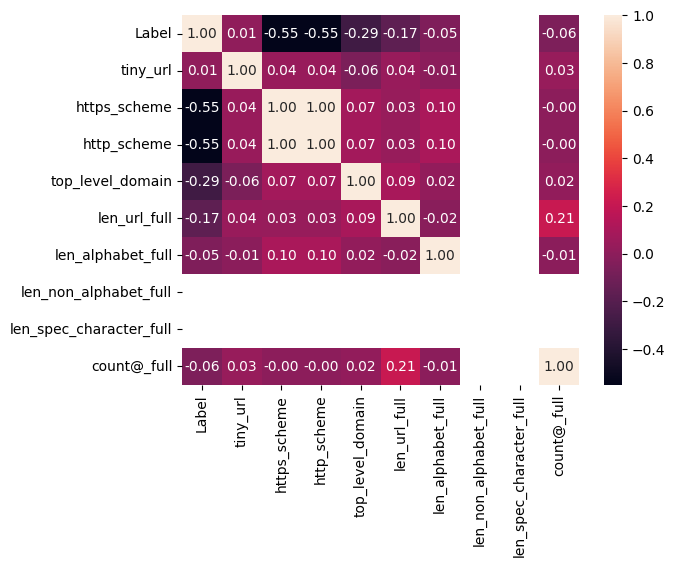

In [ ]:
corr_heatmap(x, 0, 10)

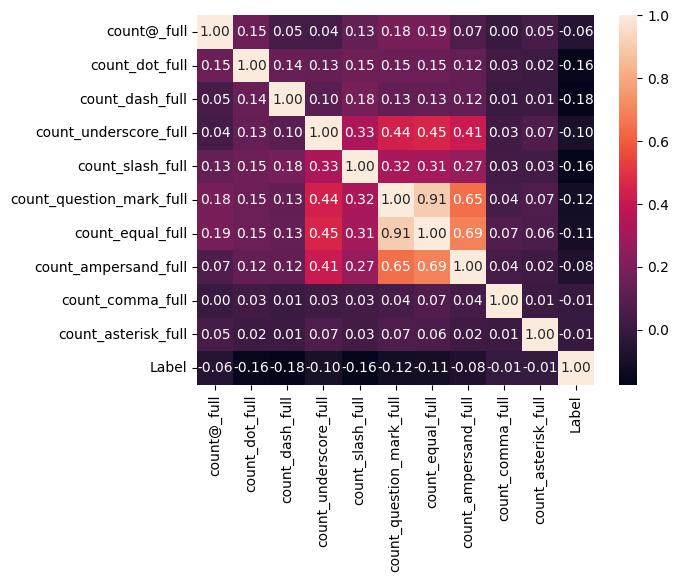

In [ ]:
corr_heatmap(data, 10, 20)

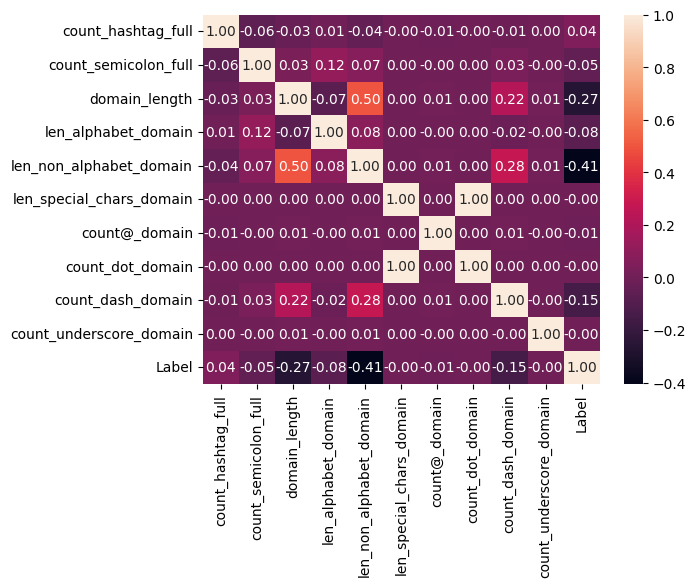

In [ ]:
corr_heatmap(data, 20, 30)

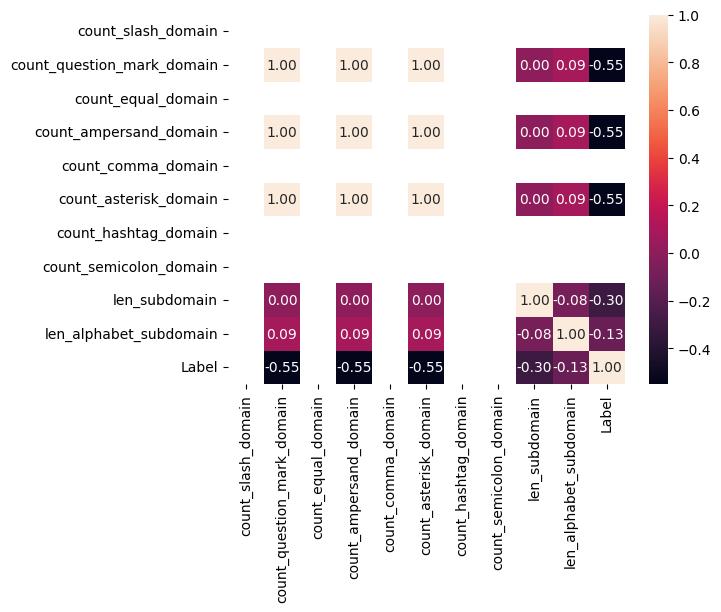

In [ ]:
corr_heatmap(data, 30, 40)

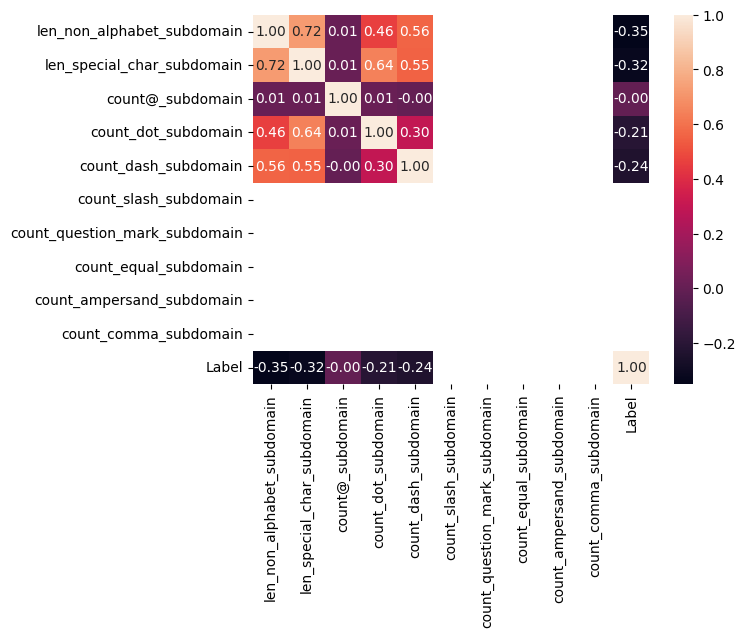

In [ ]:
corr_heatmap(data, 40, 50)

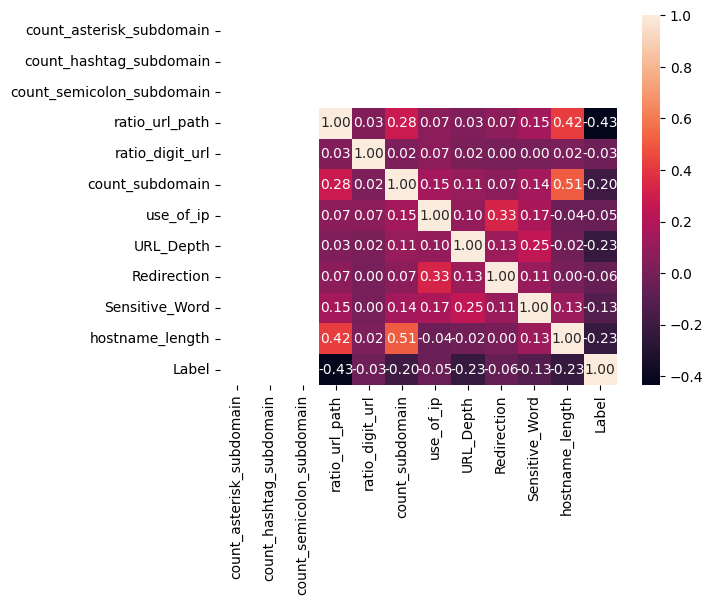

In [ ]:
corr_heatmap(data, 50, 62)

# Spliting Dataset - Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [ ]:
X_train.shape

(207718, 15)

In [ ]:
X_test.shape

(51930, 59)

# Modelling

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

#Evaluasi

##Classification Report & Train Test Evaluation

###All Fitur

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.2f" % score)

              precision    recall  f1-score   support

     Class 0       0.86      0.90      0.88     21275
     Class 1       0.93      0.90      0.91     30655

    accuracy                           0.90     51930
   macro avg       0.89      0.90      0.89     51930
weighted avg       0.90      0.90      0.90     51930

accuracy:   0.90


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 89.7 %
Akurasi Model (Test)  : 89.66 %


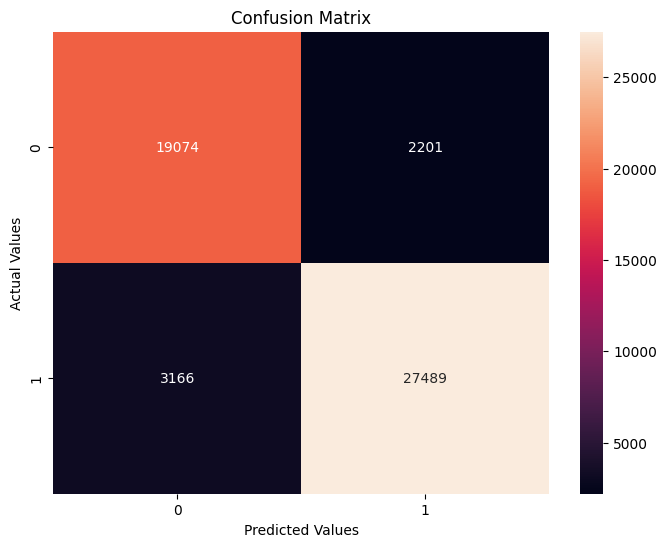

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###15 Fitur

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.2f" % score)

              precision    recall  f1-score   support

     Class 0       0.86      0.87      0.86     21275
     Class 1       0.91      0.90      0.90     30655

    accuracy                           0.89     51930
   macro avg       0.88      0.88      0.88     51930
weighted avg       0.89      0.89      0.89     51930

accuracy:   0.89


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 88.7 %
Akurasi Model (Test)  : 88.69 %


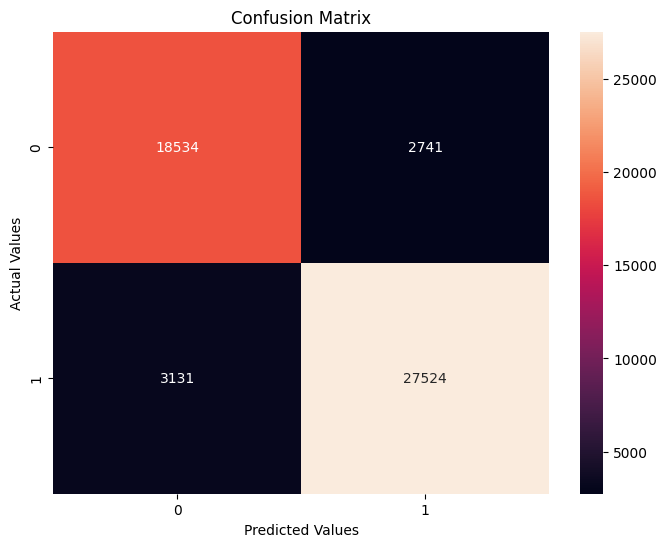

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###14 Fitur

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.2f" % score)

              precision    recall  f1-score   support

     Class 0       0.86      0.87      0.86     21275
     Class 1       0.91      0.90      0.90     30655

    accuracy                           0.89     51930
   macro avg       0.88      0.88      0.88     51930
weighted avg       0.89      0.89      0.89     51930

accuracy:   0.89


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 88.72 %
Akurasi Model (Test)  : 88.71 %


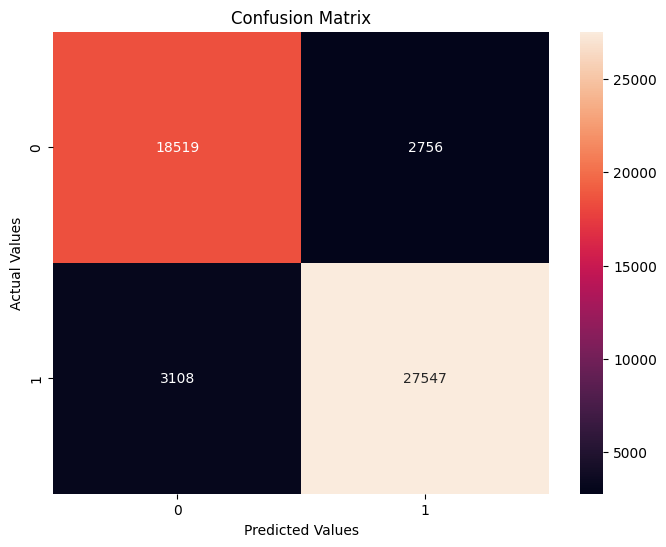

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###13 Fitur

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.2f" % score)

              precision    recall  f1-score   support

     Class 0       0.86      0.87      0.86     21275
     Class 1       0.91      0.90      0.90     30655

    accuracy                           0.89     51930
   macro avg       0.88      0.88      0.88     51930
weighted avg       0.89      0.89      0.89     51930

accuracy:   0.89


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 88.59 %
Akurasi Model (Test)  : 88.59 %


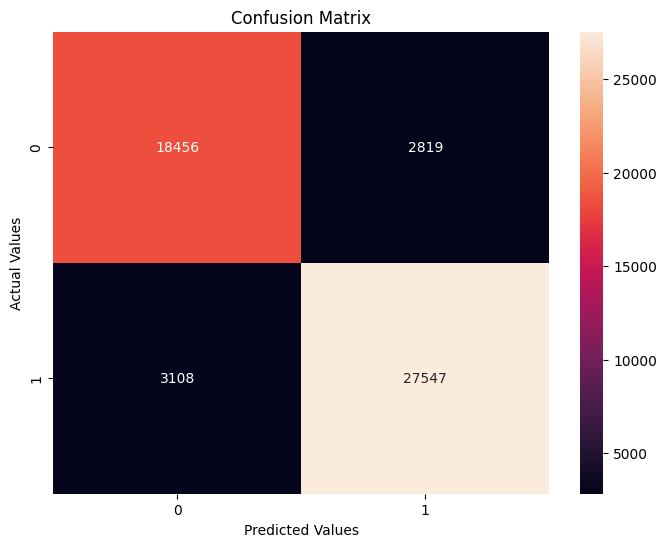

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###12 Fitur

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.2f" % score)

              precision    recall  f1-score   support

     Class 0       0.86      0.87      0.86     21275
     Class 1       0.91      0.90      0.90     30655

    accuracy                           0.89     51930
   macro avg       0.88      0.89      0.88     51930
weighted avg       0.89      0.89      0.89     51930

accuracy:   0.89


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 88.8 %
Akurasi Model (Test)  : 88.8 %


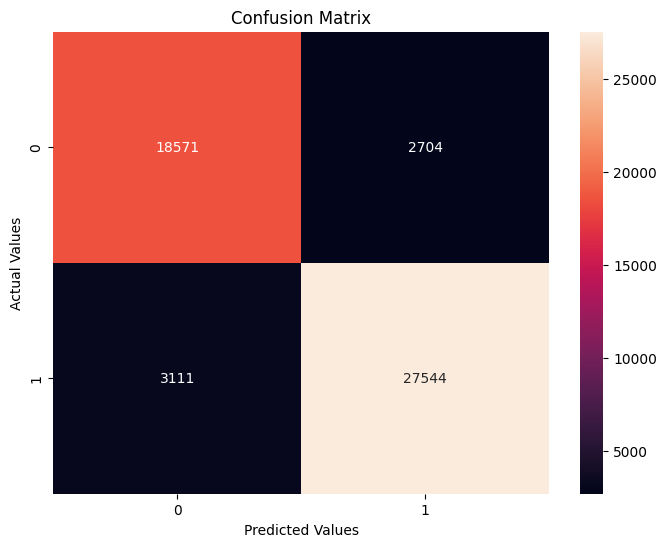

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###11 Fitur

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.2f" % score)

              precision    recall  f1-score   support

     Class 0       0.86      0.86      0.86     21275
     Class 1       0.90      0.90      0.90     30655

    accuracy                           0.88     51930
   macro avg       0.88      0.88      0.88     51930
weighted avg       0.88      0.88      0.88     51930

accuracy:   0.88


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 88.4 %
Akurasi Model (Test)  : 88.4 %


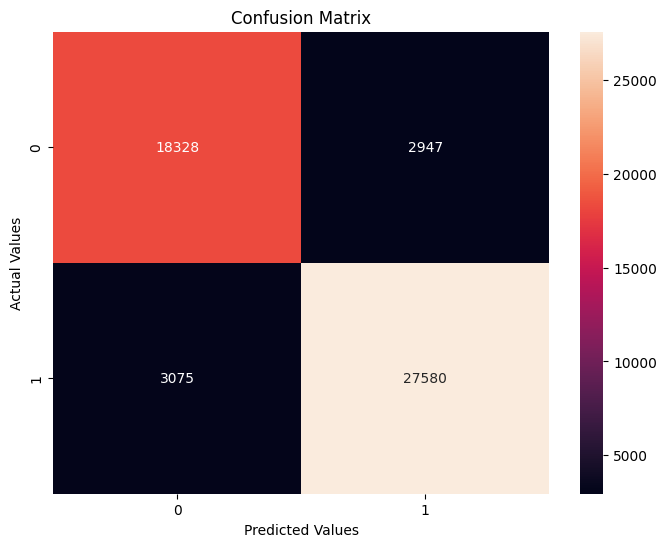

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###10 Fitur

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.2f" % score)

              precision    recall  f1-score   support

     Class 0       0.86      0.86      0.86     21275
     Class 1       0.90      0.90      0.90     30655

    accuracy                           0.88     51930
   macro avg       0.88      0.88      0.88     51930
weighted avg       0.88      0.88      0.88     51930

accuracy:   0.88


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 88.4 %
Akurasi Model (Test)  : 88.4 %


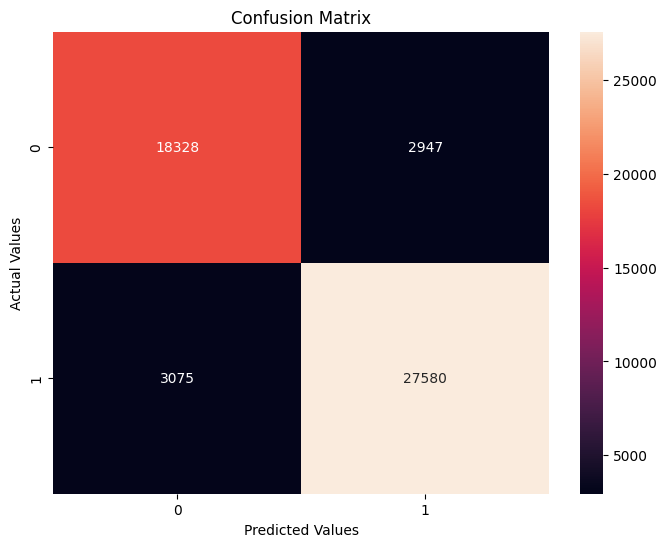

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###9 Fitur

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.2f" % score)

              precision    recall  f1-score   support

     Class 0       0.86      0.86      0.86     21275
     Class 1       0.90      0.90      0.90     30655

    accuracy                           0.88     51930
   macro avg       0.88      0.88      0.88     51930
weighted avg       0.88      0.88      0.88     51930

accuracy:   0.88


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 88.4 %
Akurasi Model (Test)  : 88.4 %


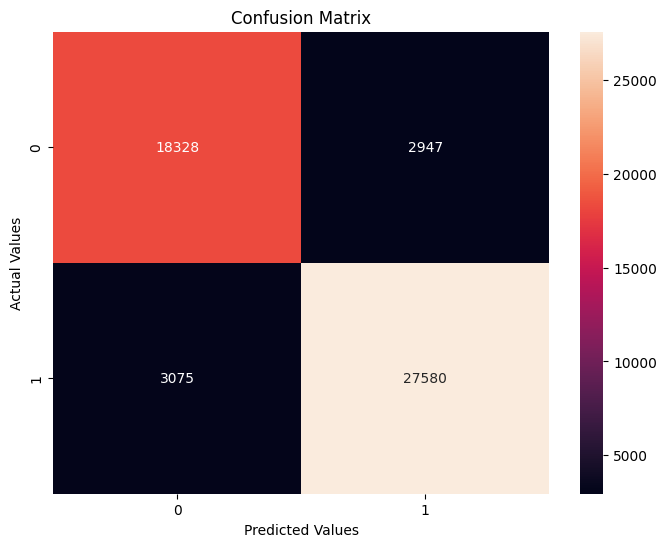

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###8 Fitur

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.2f" % score)

              precision    recall  f1-score   support

     Class 0       0.86      0.86      0.86     21275
     Class 1       0.90      0.90      0.90     30655

    accuracy                           0.88     51930
   macro avg       0.88      0.88      0.88     51930
weighted avg       0.88      0.88      0.88     51930

accuracy:   0.88


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 88.4 %
Akurasi Model (Test)  : 88.4 %


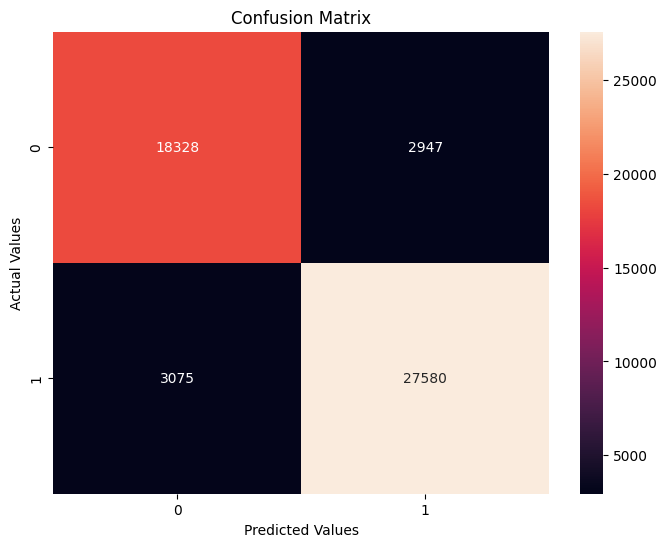

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###7 Fitur

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.2f" % score)

              precision    recall  f1-score   support

     Class 0       0.86      0.86      0.86     21275
     Class 1       0.90      0.90      0.90     30655

    accuracy                           0.88     51930
   macro avg       0.88      0.88      0.88     51930
weighted avg       0.88      0.88      0.88     51930

accuracy:   0.88


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 88.4 %
Akurasi Model (Test)  : 88.4 %


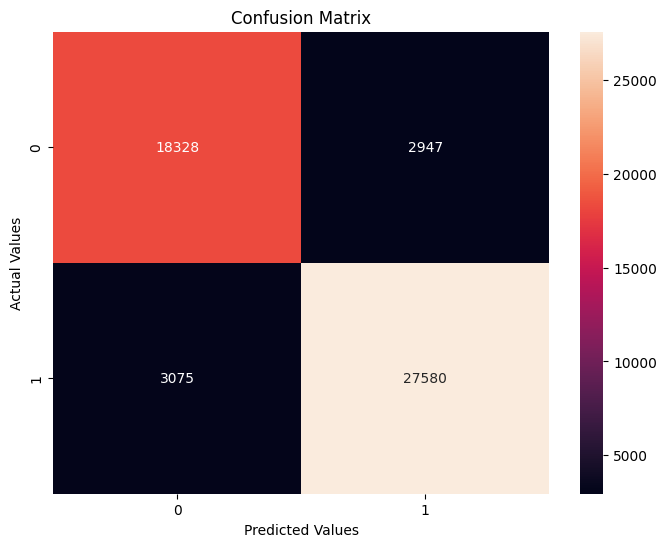

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###6Fitur

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.2f" % score)

              precision    recall  f1-score   support

     Class 0       0.86      0.86      0.86     21275
     Class 1       0.90      0.90      0.90     30655

    accuracy                           0.88     51930
   macro avg       0.88      0.88      0.88     51930
weighted avg       0.88      0.88      0.88     51930

accuracy:   0.88


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 88.4 %
Akurasi Model (Test)  : 88.4 %


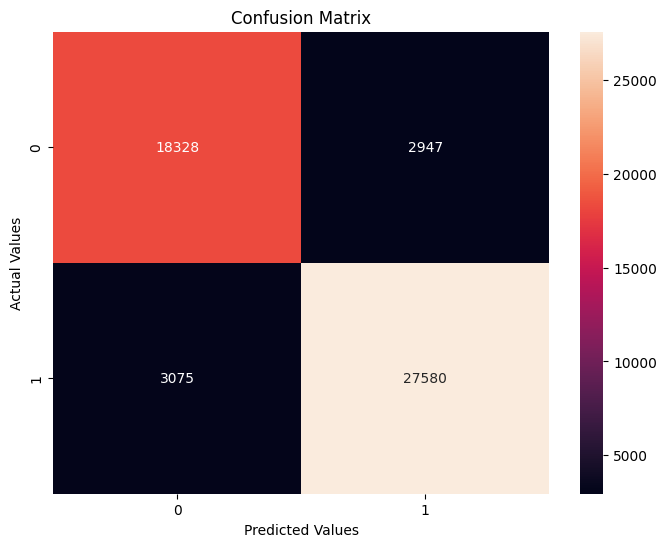

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###5 Fitur

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.2f" % score)

              precision    recall  f1-score   support

     Class 0       0.89      0.52      0.66     21275
     Class 1       0.74      0.96      0.84     30655

    accuracy                           0.78     51930
   macro avg       0.82      0.74      0.75     51930
weighted avg       0.80      0.78      0.76     51930

accuracy:   0.78


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 77.74 %
Akurasi Model (Test)  : 77.72 %


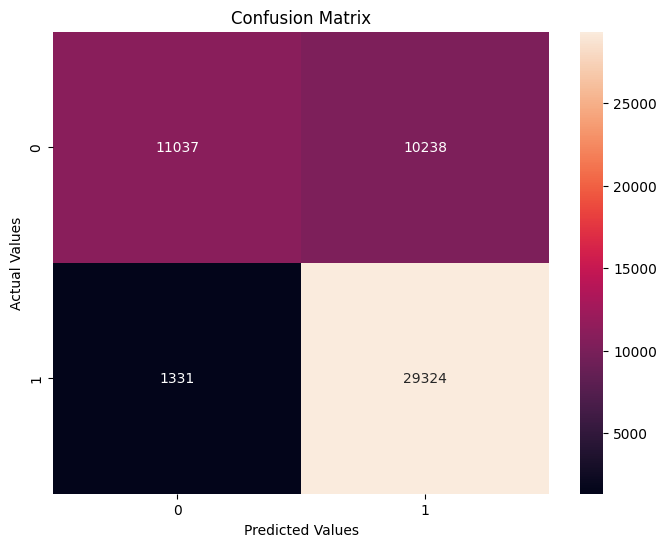

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### fitur chi2

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.2f" % score)

              precision    recall  f1-score   support

     Class 0       0.86      0.71      0.78     21275
     Class 1       0.82      0.92      0.87     30655

    accuracy                           0.83     51930
   macro avg       0.84      0.82      0.82     51930
weighted avg       0.84      0.83      0.83     51930

accuracy:   0.83


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 83.3 %
Akurasi Model (Test)  : 83.45 %


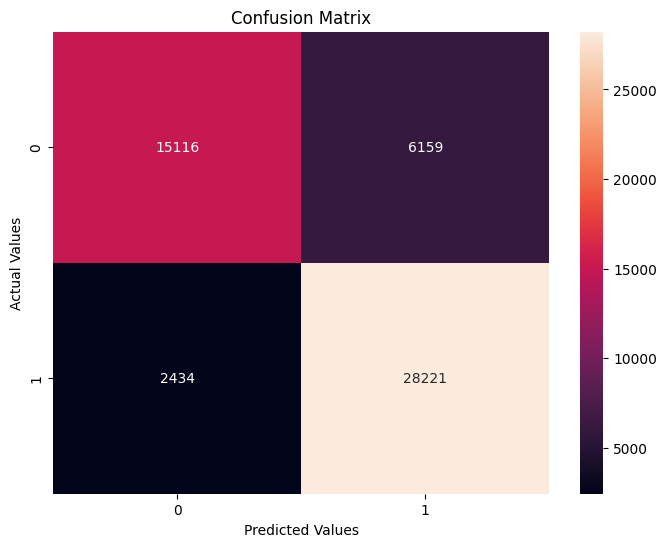

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

##K-Fold Cross Validation

###AllFitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Hasil K-Fold Cross Validation:
Akurasi: 89.68%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###15 Fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Hasil K-Fold Cross Validation:
Akurasi: 88.70%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###14 Fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Hasil K-Fold Cross Validation:
Akurasi: 88.72%


###13 Fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hasil K-Fold Cross Validation:
Akurasi: 88.59%


###12 Fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 88.80%


###11 Fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 88.40%


###10 Fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 88.40%


###9 Fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 88.40%


###8 Fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 88.40%


###7 Fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 88.40%


###6 Fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 88.40%


###5Fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 77.73%


###chi2

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 83.33%


# Prediction

###All Fitur

In [ ]:
def main(url):

    status = []

    status.append(tinyURL(url))
    status.append(httpsURL(url))
    status.append(httpURL(url))
    status.append(tldValid(url))
    status.append(getLength(url))
    status.append(alphabet_length(url))
    status.append(non_alphabet_length(url))
    status.append(special_character_length(url))
    status.append(count_at_symbol(url))
    status.append(count_dot(url))
    status.append(count_dash(url))
    status.append(count_underscore(url))
    status.append(count_slash(url))
    status.append(count_question_mark(url))
    status.append(count_equal(url))
    status.append(count_ampersand(url))
    status.append(count_comma(url))
    status.append(count_asterisk(url))
    status.append(count_hashtag(url))
    status.append(count_semicolon(url))

    status.append(domain_length(url))
    status.append(alphabet_domain_length(url))
    status.append(non_alphabet_domain_length(url))
    status.append(special_chars_domain_length(url))
    status.append(count_at_domain(url))
    status.append(count_dot_domain(url))
    status.append(count_dash_domain(url))
    status.append(count_underscore_domain(url))
    status.append(count_slash_domain(url))
    status.append(count_question_mark_domain(url))
    status.append(count_equal_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_comma_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(count_hashtag_domain(url))
    status.append(count_semicolon_domain(url))

    status.append(len_subdomain(url))
    status.append(alphabet_subdomain_length(url))
    status.append(non_alphabet_subdomain_length(url))
    status.append(spec_character_subdomain_length(url))
    status.append(count_at_subdomain(url))
    status.append(count_dot_subdomain(url))
    status.append(count_dash_subdomain(url))
    status.append(count_slash_subdomain(url))
    status.append(count_question_mark_subdomain(url))
    status.append(count_equal_subdomain(url))
    status.append(count_ampersand_subdomain(url))
    status.append(count_comma_subdomain(url))
    status.append(count_asterisk_subdomain(url))
    status.append(count_hashtag_subdomain(url))
    status.append(count_semicolon_subdomain(url))

    status.append(calculate_url_path_ratio(url))
    status.append(calculate_digit_ratio(url))
    status.append(count_subdomains(url))
    status.append(having_ip_address(url))

    status.append(getDepth(url))
    status.append(redirection(url))
    status.append(detect_sensitive_words(url))
    status.append(hostname_length(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
************************
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###15 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(non_alphabet_domain_length(url))
    status.append(non_alphabet_subdomain_length(url))
    status.append(spec_character_subdomain_length(url))
    status.append(len_subdomain(url))
    status.append(domain_length(url))
    status.append(count_dash_subdomain(url))
    status.append(hostname_length(url))
    status.append(count_dot_subdomain(url))
    status.append(count_subdomains(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
PHISHING
PHISHING
PHISHING
GOOD
GOOD
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###14 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(non_alphabet_domain_length(url))
    status.append(non_alphabet_subdomain_length(url))
    status.append(spec_character_subdomain_length(url))
    status.append(len_subdomain(url))
    status.append(domain_length(url))
    status.append(count_dash_subdomain(url))
    status.append(hostname_length(url))
    status.append(count_dot_subdomain(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
PHISHING
PHISHING
PHISHING
GOOD
GOOD
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###13 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(non_alphabet_domain_length(url))
    status.append(non_alphabet_subdomain_length(url))
    status.append(spec_character_subdomain_length(url))
    status.append(len_subdomain(url))
    status.append(domain_length(url))
    status.append(count_dash_subdomain(url))
    status.append(hostname_length(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
PHISHING
PHISHING
PHISHING
GOOD
GOOD
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###12 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(non_alphabet_domain_length(url))
    status.append(non_alphabet_subdomain_length(url))
    status.append(spec_character_subdomain_length(url))
    status.append(len_subdomain(url))
    status.append(domain_length(url))
    status.append(count_dash_subdomain(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
PHISHING
PHISHING
PHISHING
GOOD
GOOD
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###11 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(non_alphabet_domain_length(url))
    status.append(non_alphabet_subdomain_length(url))
    status.append(spec_character_subdomain_length(url))
    status.append(len_subdomain(url))
    status.append(domain_length(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
PHISHING
PHISHING
PHISHING
GOOD
GOOD
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###10 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(non_alphabet_domain_length(url))
    status.append(non_alphabet_subdomain_length(url))
    status.append(spec_character_subdomain_length(url))
    status.append(len_subdomain(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
PHISHING
PHISHING
PHISHING
GOOD
GOOD
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###9 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(non_alphabet_domain_length(url))
    status.append(non_alphabet_subdomain_length(url))
    status.append(spec_character_subdomain_length(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
PHISHING
PHISHING
PHISHING
GOOD
GOOD
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###8 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(non_alphabet_domain_length(url))
    status.append(non_alphabet_subdomain_length(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
PHISHING
PHISHING
PHISHING
GOOD
GOOD
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###7 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(non_alphabet_domain_length(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
PHISHING
PHISHING
PHISHING
GOOD
GOOD
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###6 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
GOOD
PHISHING
PHISHING
************************
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
GOOD
GOOD
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###5 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
GOOD
GOOD
PHISHING
PHISHING
PHISHING
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

#Save Model Logistic Regression

In [ ]:
import joblib
joblib.dump((logreg), "model_phishing_lr.model")

['model_phishing_lr.model']

In [ ]:
# from joblib import load
# import datetime
# import pandas as pd

# def get_prediction_from_url(url, model):
#     features_test = main(url)
#     features_test = np.array(features_test).reshape((1, -1))
#     pred = model.predict(features_test)
#     if int(pred[0]) == 0:
#         return "GOOD"
#     elif int(pred[0]) == 1:
#         return "PHISHING"

# loaded_model = load('model_phishing_lr.model')
# prediction_history = []

# while True:
#     url = input("Masukkan URL (atau tekan Enter untuk keluar): ")
#     if not url:
#         break

#     prediction = get_prediction_from_url(url, loaded_model)
#     print("Prediksi:", prediction)

#     timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
#     prediction_history.append((url, prediction, timestamp))

# # Konversi riwayat prediksi menjadi DataFrame pandas
# df = pd.DataFrame(prediction_history, columns=['URL', 'Prediksi', 'Timestamp'])

# # Simpan DataFrame ke dalam file Excel
# df.to_excel('prediction_history.xlsx', index=False)

In [ ]:
# from joblib import load
# import datetime
# import pandas as pd

# loaded_model = load('/content/model_phishing_lr.model')

# predict_bad = []
# predict_good = []
# prediction_history= []

# while True:
#     url = input("Masukkan URL (atau tekan Enter untuk keluar): ")
#     if not url:
#         break

#     prediction = get_prediction_from_url(url, loaded_model)
#     print("Prediksi:", prediction)

#     timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
#     prediction_history.append((url, prediction, timestamp))

In [ ]:
# # Konversi riwayat prediksi menjadi DataFrame pandas
# df = pd.DataFrame(prediction_history, columns=['URL', 'Prediksi', 'Timestamp'])

# # Simpan DataFrame ke dalam file Excel
# df.to_excel('prediction_history.xlsx', index=False)